In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#this is downloading the data
Bedforms = pd.read_csv('data/BedformData.csv')
y = Bedforms['Y/N'] #results data that will be used to compare to the trained output
X = Bedforms[['Topo', 'Bed', 'Elong', 'Area']] #input data that will be used to train the results

In [3]:
#we are changing all string inputs to binarized integers so they can be processed by the model.
X.loc[X['Topo'] == 'O', 'Topo'] = 1
X.loc[X['Topo'] == 'V', 'Topo'] = 0

X.loc[X['Bed'] == 'C', 'Bed'] = 1
X.loc[X['Bed'] == 'S', 'Bed'] = 0

In [4]:
X.dtypes

Topo      object
Bed       object
Elong    float64
Area     float64
dtype: object

In [5]:
X = X.astype('int8') #change all columns of the input dataset to integers from string

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [344]:
#adding controls to get a better fit
#n_estimators - how many "trees" are in the "forest", default was 100 making it wider to 1000 is approx 2%, increasing testing tuning
#min_samples_leaf - control of number of times it runs-- average of more runs, changing from 8 to 50
#random_state - reproducibility, not the modeling or stats aspect
rf_model = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, min_samples_split=150, random_state=42, n_jobs=-1) #using all 4 cpus
rf_model.fit(X, y)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=150, n_jobs=-1,
                       random_state=42)

In [331]:
#find random selection of the data to test the model, try using 10% 
#these are the same rows for X and y because of random_state bits chosing the same columns (this is how it can be reproduced)
X_test = X.sample(frac = 0.2, random_state=42)
y_test = y.sample(frac = 0.2, random_state=42)

In [345]:
y_est = rf_model.predict(X_test) #same this as saying y_pred

In [346]:
y_pred_prob = rf_model.predict_proba(X)

In [347]:
y_pred_prob

array([[0.62723799, 0.37276201],
       [0.93876912, 0.06123088],
       [0.98820693, 0.01179307],
       ...,
       [0.99160334, 0.00839666],
       [0.99295101, 0.00704899],
       [0.85093354, 0.14906646]])

In [333]:
#using the 10% of data we selected, we're determining how many predictions are right out of the number it makes
import matplotlib.pyplot as plt
print(f'Prediction Count: {len(y_est)}')
print(f'Correct Predictions: {len(y_est[y_est == y_test])}')

Prediction Count: 117159
Correct Predictions: 114168


In [334]:
#calculate the percentage of correct predictions out of total predictions for 10% random data selection
114180/117159

0.9745730161575296

In [7]:
#cross-validate a grid, it'll run all options and determine the best one
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [8]:
#coarse-grid validation
param_grid = {
    'max_features': ['sqrt'],
    'min_samples_leaf': [2, 5, 10],
    'min_samples_split': [5, 10, 25, 50, 75, 100],
    'n_estimators': [100, 500, 1000, 2500]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid,
                           cv=KFold(n_splits=5, shuffle=True, random_state=42), verbose=2) #changing when it updates me

grid_search.fit(X, y)

#after this, depending on the best fit, we will run a higher resolution grid validation

In [7]:
import joblib
joblib.dump(grid_search.best_estimator_, 'RandomForest.pkl')

['RandomForest.pkl']

In [9]:
grid_search.best_estimator_

RandomForestClassifier(min_samples_leaf=5, min_samples_split=100,
                       random_state=42)

In [3]:
import joblib
grid_search = joblib.load('RandomForest.pkl')
grid_search.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [9]:
#cross-validate a grid, it'll run all options and determine the best one
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
#coarse-grid validation
param_grid = {
    'max_features': ['sqrt'],
    'min_samples_leaf': [2, 5, 10],
    'min_samples_split': [100, 150, 200, 500],
    'n_estimators': [10, 50, 75, 100]}
grid_search_small = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid,
                           cv=KFold(n_splits=5, shuffle=True, random_state=42), verbose=2) #changing when it updates me

grid_search_small.fit(X, y)

#after this, depending on the best fit, we will run a higher resolution grid validation

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=10; total time=   3.7s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=10; total time=   3.8s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=10; total time=   3.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=10; total time=   3.5s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=10; total time=   3.8s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=50; total time=  17.8s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=50; total time=  17.9s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=50; total time=  17.8s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimator

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [100, 150, 200, 500],
                         'n_estimators': [10, 50, 75, 100]},
             verbose=2)

In [11]:
import joblib
joblib.dump(grid_search_small.best_estimator_, 'RandomForest_small.pkl')

['RandomForest_small.pkl']

In [12]:
grid_search_small = joblib.load('RandomForest_small.pkl')
grid_search_small.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 150,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#find random selection of the data to test the model, try using 10% 
#these are the same rows for X and y because of random_state bits chosing the same columns (this is how it can be reproduced)
X_test = X.sample(frac = 0.2, random_state=42)
y_test = y.sample(frac = 0.2, random_state=42)

In [ ]:
y_est = rf_model.predict(X_test) #same this as saying y_pred

In [ ]:
#using the 10% of data we selected, we're determining how many predictions are right out of the number it makes
import matplotlib.pyplot as plt
print(f'Prediction Count: {len(y_est)}')
print(f'Correct Predictions: {len(y_est[y_est == y_test])}')

### Optimize True Positive Detection

Now we'll cross-validate using the F1 score, which should help with calculating our true positives.

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score

In [14]:
# Define the parameter grid
param_grid = {
    'max_features': ['sqrt'],
    'min_samples_leaf': [2, 5, 10],
    'min_samples_split': [100, 150, 200, 500],
    'n_estimators': [10, 50, 75, 100]
}

In [15]:
# Define scoring metrics
scoring = {
    'f1_score': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

In [16]:
# Initialize GridSearchCV
grid_search_small = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring=scoring,
    refit='f1_score',  # Refit to F1 score
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    verbose=2
)

In [17]:
# Fit the grid search
grid_search_small.fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=10; total time=   3.3s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=10; total time=   3.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=10; total time=   3.1s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=10; total time=   3.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=10; total time=   3.3s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=50; total time=  15.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=50; total time=  15.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=50; total time=  15.5s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimator

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [100, 150, 200, 500],
                         'n_estimators': [10, 50, 75, 100]},
             refit='f1_score',
             scoring={'f1_score': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')},
             verbose=2)

In [18]:
# Best parameters
print("Best parameters:", grid_search_small.best_params_)

# Best scores based on the prioritized metric (F1 score) and others
print("Best F1 score:", grid_search_small.best_score_)
print("Best Precision score:", grid_search_small.cv_results_['mean_test_precision'][grid_search_small.best_index_])
print("Best Recall score:", grid_search_small.cv_results_['mean_test_recall'][grid_search_small.best_index_])

Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 100, 'n_estimators': 10}
Best F1 score: 0.2092902127945297
Best Precision score: 0.6676010927089733
Best Recall score: 0.12412059961224467


Okay, so CV isn't doing great on the minimum class. Let's first try weighting to see what we get.

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, 
                                  min_samples_split=150, random_state=42,
                                  class_weight='balanced',
                                  n_jobs=-1) 
rf_model.fit(X, y)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=5,
                       min_samples_split=150, n_jobs=-1, random_state=42)

In [20]:
y_pred = rf_model.predict(X)

In [21]:
# Calculate precision
precision = precision_score(y, y_pred)

# Calculate recall
recall = recall_score(y, y_pred)

# Calculate F1 score
f1 = f1_score(y, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.12002262879771655
Recall: 0.5968670076726342
F1 Score: 0.1998565571576908


Balanced overdoes it. Let's see what we can do. I'll try to set it to inverse class frequency.

In [24]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights based on inverse class frequency
class_labels = np.unique(y)  
class_weights = compute_class_weight('balanced', classes=class_labels, y=y)

# Create a dictionary mapping class labels to class weights
class_weights_dict = dict(zip(class_labels, class_weights))

print("Class Weights:", class_weights_dict)

Class Weights: {0: 0.5137155445176408, 1: 18.727493606138108}


In [25]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, 
                                  min_samples_split=150, random_state=42,
                                  class_weight=class_weights_dict,
                                  n_jobs=-1) 
rf_model.fit(X, y)

RandomForestClassifier(class_weight={0: 0.5137155445176408,
                                     1: 18.727493606138108},
                       min_samples_leaf=5, min_samples_split=150, n_jobs=-1,
                       random_state=42)

In [26]:
y_pred = rf_model.predict(X)

In [27]:
# Calculate precision
precision = precision_score(y, y_pred)

# Calculate recall
recall = recall_score(y, y_pred)

# Calculate F1 score
f1 = f1_score(y, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.12002262879771655
Recall: 0.5968670076726342
F1 Score: 0.1998565571576908


Okay, at least we've proved how it's finding the weights. I think we might need to artificially sample down the overrepresented class.

In [99]:
from collections import Counter

def random_undersample(X, y, undersample_proportion):
    # Combine features and labels
    data = np.column_stack((X, y))

    # Determine the class with fewer instances
    counter = Counter(y)
    minority_class = min(counter, key=counter.get)
    majority_class = max(counter, key=counter.get)

    # Calculate the number of instances to undersample based on the proportion
    undersample_size = int(counter[majority_class] * undersample_proportion)

    # Get indices of instances belonging to the majority class
    majority_indices = np.where(y == majority_class)[0]

    # Randomly select indices from the majority class equal to the undersample size
    undersampled_indices = np.random.choice(majority_indices, size=undersample_size, replace=False)

    # Select all instances of minority class
    minority_indices = np.where(y == minority_class)[0]

    # Combine undersampled majority class with minority class
    undersampled_data = np.vstack((data[undersampled_indices], data[minority_indices]))

    # Shuffle the data
    np.random.shuffle(undersampled_data)

    # Separate features and labels
    X_undersampled = undersampled_data[:, :-1]
    y_undersampled = undersampled_data[:, -1]
    
    # Convert X_undersampled back to DataFrame with original column names
    X_undersampled_df = pd.DataFrame(X_undersampled, columns=X.columns)
    
    return X_undersampled_df, y_undersampled

In [100]:
ratio=len(y[y==1])/len(y[y==0])

In [101]:
X_undersampled, y_undersampled = random_undersample(X, y, ratio)

In [102]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, 
                                  min_samples_split=150, random_state=42,
                                  class_weight='balanced',
                                  n_jobs=-1) 

In [103]:
rf_model.fit(X_undersampled, y_undersampled)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=5,
                       min_samples_split=150, n_jobs=-1, random_state=42)

In [104]:
y_pred = rf_model.predict(X)

In [105]:
# Calculate precision
accuracy = accuracy_score(y, y_pred)

# Calculate precision
precision = precision_score(y, y_pred)

# Calculate recall
recall = recall_score(y, y_pred)

# Calculate F1 score
f1 = f1_score(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8612127771442618
Precision: 0.10979711660743786
Recall: 0.5906649616368287
F1 Score: 0.18517293564649168


Okay, I need to do a much better job of sampling downwards. Let's look at some distributions.

In [106]:
print(len(X))
print(len(X_undersampled))

585796
31280


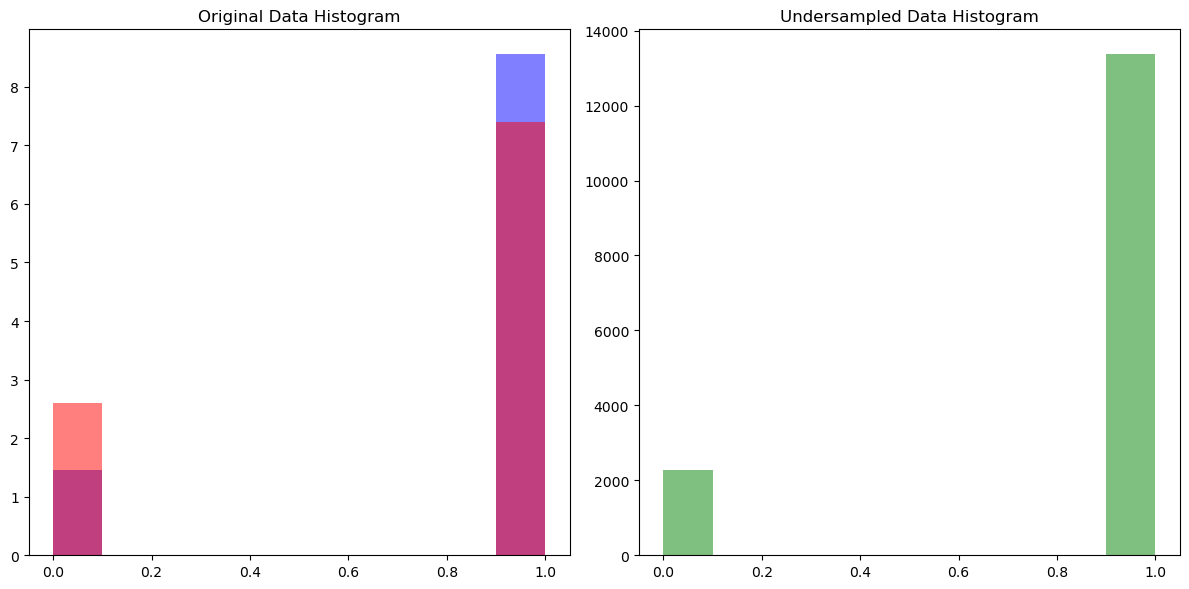

In [131]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(X['Topo'][y == 0], bins=10, color='blue', density=True,
            alpha=0.5, label='Original Data')
axs[0].hist(X['Topo'][y == 1], bins=10, color='red', density=True,
            alpha=0.5, label='Original Data')
axs[1].hist(X_undersampled['Topo'][y_undersampled == 0], bins=10, color='green', alpha=0.5, label='Undersampled Data')

axs[0].set_title('Original Data Histogram')
axs[1].set_title('Undersampled Data Histogram')

plt.tight_layout()

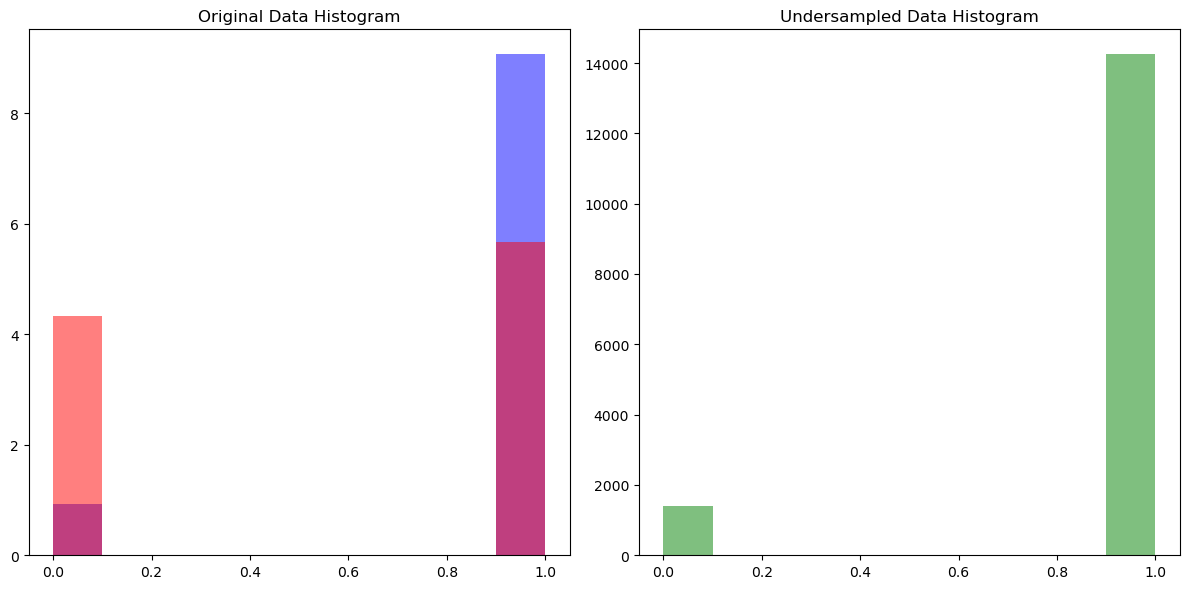

In [130]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(X['Bed'][y == 0], bins=10, color='blue', density=True,
            alpha=0.5, label='Original Data')
axs[0].hist(X['Bed'][y == 1], bins=10, color='red', density=True,
            alpha=0.5, label='Original Data')
axs[1].hist(X_undersampled['Bed'][y_undersampled == 0], bins=10, color='green', alpha=0.5, label='Undersampled Data')

axs[0].set_title('Original Data Histogram')
axs[1].set_title('Undersampled Data Histogram')

plt.tight_layout()

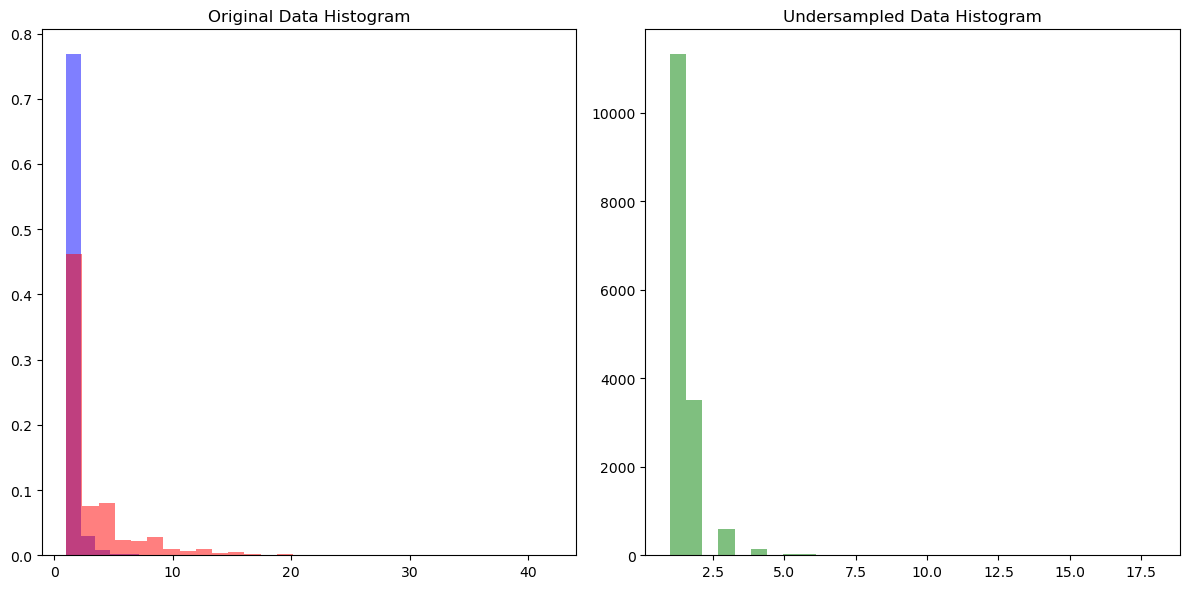

In [114]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(X['Elong'][y == 0], bins=30, color='blue', density=True,
            alpha=0.5, label='Original Data')
axs[0].hist(X['Elong'][y == 1], bins=30, color='red', density=True,
            alpha=0.5, label='Original Data')
axs[1].hist(X_undersampled['Elong'][y_undersampled == 0], bins=30, color='green', alpha=0.5, label='Undersampled Data')

axs[0].set_title('Original Data Histogram')
axs[1].set_title('Undersampled Data Histogram')

plt.tight_layout();

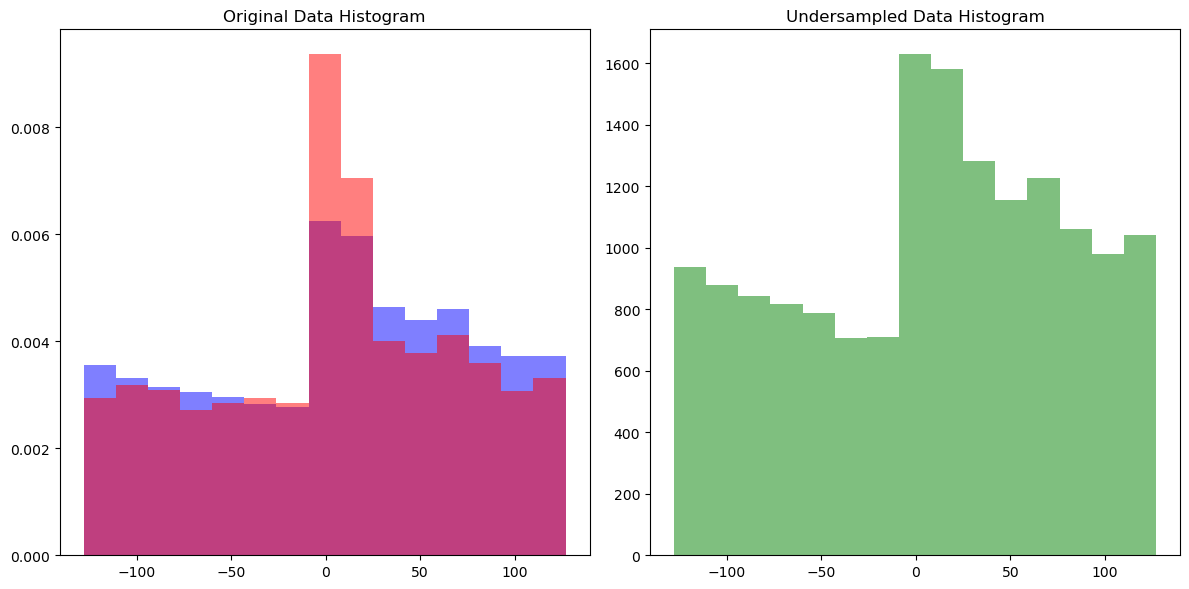

In [112]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(X['Area'][y == 0], bins=15, color='blue', density=True,
            alpha=0.5, label='Original Data')
axs[0].hist(X['Area'][y == 1], bins=15, color='red', density=True,
            alpha=0.5, label='Original Data')
axs[1].hist(X_undersampled['Area'][y_undersampled == 0], bins=15, color='green', alpha=0.5, label='Undersampled Data')

axs[0].set_title('Original Data Histogram')
axs[1].set_title('Undersampled Data Histogram')

plt.tight_layout();

The distributions are very similar. Let's try some specialty imbalanced classifier methods.

In [100]:
pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 3.4 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [101]:
from imblearn.ensemble import EasyEnsembleClassifier

In [102]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, 
                                  min_samples_split=150, random_state=42, 
                                  n_jobs=-1) 

In [110]:
eec_model = EasyEnsembleClassifier(n_estimators=100, sampling_strategy=1.0,
                                   replacement=False, n_jobs=-1,
                                   random_state=18)

In [111]:
eec_model.fit(X, y)

EasyEnsembleClassifier(n_estimators=100, n_jobs=-1, random_state=18,
                       sampling_strategy=1.0)

In [112]:
y_pred = eec_model.predict(X)

In [113]:
# Calculate precision
accuracy = accuracy_score(y, y_pred)

# Calculate precision
precision = precision_score(y, y_pred)

# Calculate recall
recall = recall_score(y, y_pred)

# Calculate F1 score
f1 = f1_score(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8551031417080349
Precision: 0.10524515393386545
Recall: 0.590153452685422
F1 Score: 0.1786336365395781


Okay, I potentially need to do a grid search now to find the best option for this one. I'm going to write a grid search for this eec.

In [122]:
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],            
    'sampling_strategy': ['auto', 'majority', 1.0],  
    'replacement': [True, False],     
}

In [123]:
# Define scoring metrics
scoring = {
    'f1_score': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

In [124]:
# Initialize GridSearchCV
grid_search_eec = GridSearchCV(
    estimator=EasyEnsembleClassifier(random_state=42),
    param_grid=param_grid,
    scoring=scoring,
    refit='f1_score',  # Refit to F1 score
    cv=5,  # Number of cross-validation folds
    verbose=2
)

In [125]:
# Perform grid search
grid_search_eec.fit(X, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END n_estimators=10, replacement=True, sampling_strategy=auto; total time=   5.1s
[CV] END n_estimators=10, replacement=True, sampling_strategy=auto; total time=   5.1s
[CV] END n_estimators=10, replacement=True, sampling_strategy=auto; total time=   5.2s
[CV] END n_estimators=10, replacement=True, sampling_strategy=auto; total time=   5.1s
[CV] END n_estimators=10, replacement=True, sampling_strategy=auto; total time=   5.1s
[CV] END n_estimators=10, replacement=True, sampling_strategy=majority; total time=   5.1s
[CV] END n_estimators=10, replacement=True, sampling_strategy=majority; total time=   5.0s
[CV] END n_estimators=10, replacement=True, sampling_strategy=majority; total time=   5.1s
[CV] END n_estimators=10, replacement=True, sampling_strategy=majority; total time=   5.1s
[CV] END n_estimators=10, replacement=True, sampling_strategy=majority; total time=   5.1s
[CV] END n_estimators=10, replacement=True, samp

GridSearchCV(cv=5, estimator=EasyEnsembleClassifier(random_state=42),
             param_grid={'n_estimators': [10, 50, 100, 150, 200],
                         'replacement': [True, False],
                         'sampling_strategy': ['auto', 'majority', 1.0]},
             refit='f1_score',
             scoring={'f1_score': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')},
             verbose=2)

In [126]:
# Best parameters
print("Best parameters:", grid_search_eec.best_params_)

# Best scores based on the prioritized metric (F1 score) and others
print("Best F1 score:", grid_search_eec.best_score_)
print("Best Precision score:", grid_search_eec.cv_results_['mean_test_precision'][grid_search_small.best_index_])
print("Best Recall score:", grid_search_eec.cv_results_['mean_test_recall'][grid_search_small.best_index_])

Best parameters: {'n_estimators': 10, 'replacement': True, 'sampling_strategy': 'auto'}
Best F1 score: 0.19212572563724156
Best Precision score: 0.13676662173831064
Best Recall score: 0.5456521739130435


In [128]:
y_pred = best_estimator = grid_search_eec.best_estimator_.predict(X)

In [17]:
from sklearn.metrics import confusion_matrix

In [130]:
conf_matrix = confusion_matrix(y, y_pred)

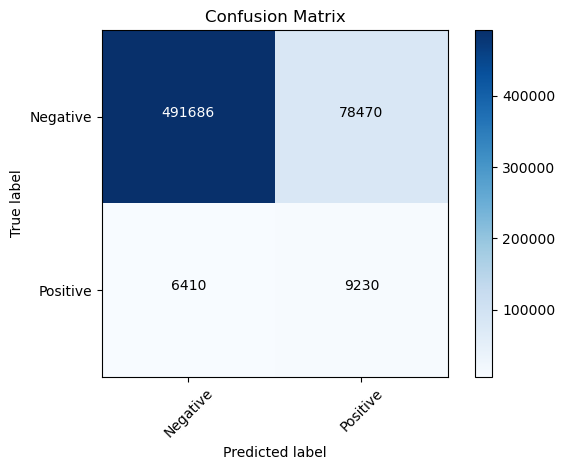

In [131]:
# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['Negative', 'Positive']  # Assuming class names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

### SMOTE oversampling

We're still not reaching the ideal using ensemble methods developed for class imbalance, so we'll try some other things, like SMOTE and ADASYN oversampling, because all we're doing now is overpredicting and hopefully this will help.

In [11]:
X = X[['Bed','Elong','Area']]

In [133]:
from imblearn.over_sampling import SMOTE

In [134]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy=1.0, k_neighbors=30)

In [135]:
# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

In [136]:
len(y_resampled[y_resampled==1])

570156

At some point, look at the distributions to make sure that those have been preserved.

In [137]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, 
                                  min_samples_split=150, random_state=42, 
                                  n_jobs=-1) 
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=150, n_jobs=-1,
                       random_state=42)

In [138]:
y_pred = rf_model.predict(X)

In [139]:
# Calculate precision
accuracy = accuracy_score(y, y_pred)

# Calculate precision
precision = precision_score(y, y_pred)

# Calculate recall
recall = recall_score(y, y_pred)

# Calculate F1 score
f1 = f1_score(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8808117501655867
Precision: 0.12347806749318953
Recall: 0.5680306905370844
F1 Score: 0.2028588391103804


In [140]:
conf_matrix = confusion_matrix(y, y_pred)

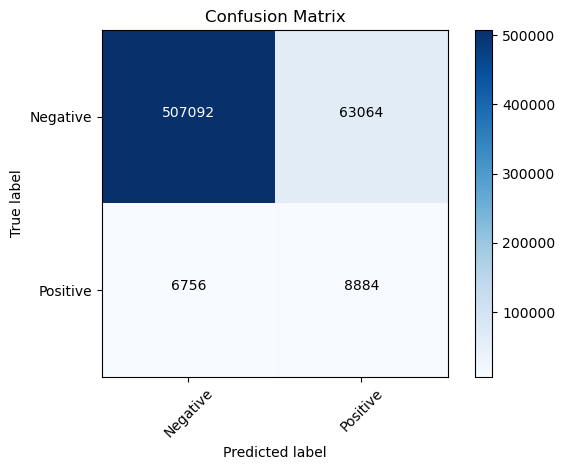

In [141]:
# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['Negative', 'Positive']  # Assuming class names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

Next, try alternatives to SMOTE. SMOTEN is made for categorical data, but from below doesn't seem to work better.

In [211]:
from imblearn.over_sampling import SMOTEN

In [219]:
smoten = SMOTEN(sampling_strategy=1.0)

In [220]:
X_resampled, y_resampled = smoten.fit_resample(X, y)

In [221]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, 
                                  min_samples_split=150, random_state=42, 
                                  n_jobs=-1) 
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=150, n_jobs=-1,
                       random_state=42)

In [222]:
y_pred = rf_model.predict(X)

In [223]:
# Calculate precision
accuracy = accuracy_score(y, y_pred)

# Calculate precision
precision = precision_score(y, y_pred)

# Calculate recall
recall = recall_score(y, y_pred)

# Calculate F1 score
f1 = f1_score(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8645910863167382
Precision: 0.1056158343242172
Recall: 0.5452046035805627
F1 Score: 0.1769527683240641


In [224]:
conf_matrix = confusion_matrix(y, y_pred)

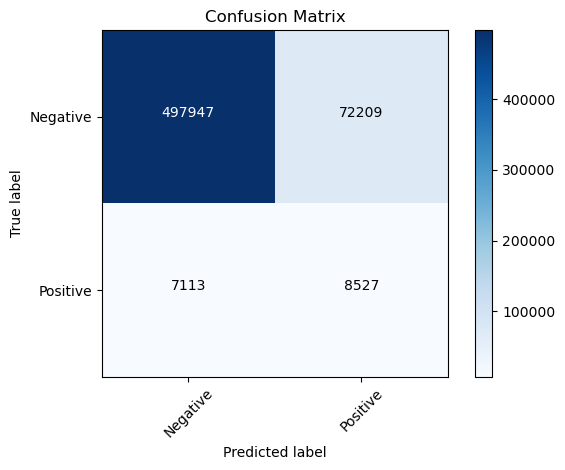

In [225]:
# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['Negative', 'Positive']  # Assuming class names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

Next we'll try ADASYN

In [34]:
from imblearn.over_sampling import ADASYN

In [205]:
ada = ADASYN(sampling_strategy=1, 
             n_neighbors=13,
             random_state=42)

In [206]:
X_resampled, y_resampled = ada.fit_resample(X, y)

In [207]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, 
                                  min_samples_split=150, random_state=42, 
                                  n_jobs=-1) 
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=150, n_jobs=-1,
                       random_state=42)

In [208]:
y_pred = rf_model.predict(X)

In [209]:
# Calculate precision
accuracy = accuracy_score(y, y_pred)

# Calculate precision
precision = precision_score(y, y_pred)

# Calculate recall
recall = recall_score(y, y_pred)

# Calculate F1 score
f1 = f1_score(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8695962416950611
Precision: 0.11579812800404755
Recall: 0.5853580562659847
F1 Score: 0.19334741288278776


In [210]:
conf_matrix = confusion_matrix(y, y_pred)

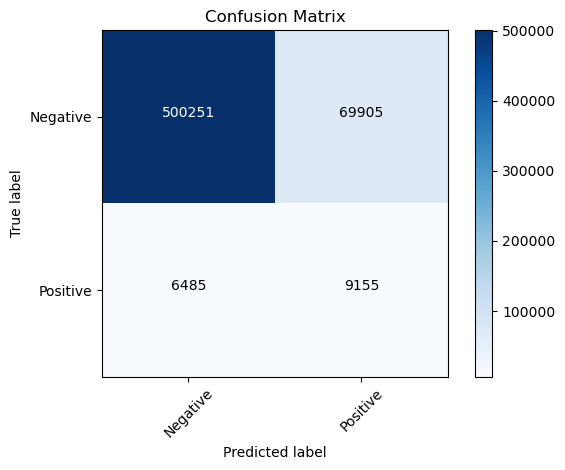

In [211]:
# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['Negative', 'Positive']  # Assuming class names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

Try SVMSMOTE which has been shown to have similar performance as ADASYN on preserving the underrepresented data. As we can see above, ADASYN does the best job on TP, but the tradeoff is a huge amount of FP.

In [13]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.12.2-py3-none-any.whl.metadata (8.2 kB)
Using cached imbalanced_learn-0.12.2-py3-none-any.whl (257 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
from imblearn.over_sampling import SVMSMOTE

In [27]:
svmsmote = SVMSMOTE(k_neighbors=15,
                    m_neighbors=15,
                    random_state=42)

In [28]:
X_resampled, y_resampled = svmsmote.fit_resample(X, y)

In [29]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, 
                                  min_samples_split=150, random_state=42, 
                                  n_jobs=-1) 
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=150, n_jobs=-1,
                       random_state=42)

In [30]:
y_pred = rf_model.predict(X)

In [31]:
# Calculate precision
accuracy = accuracy_score(y, y_pred)

# Calculate precision
precision = precision_score(y, y_pred)

# Calculate recall
recall = recall_score(y, y_pred)

# Calculate F1 score
f1 = f1_score(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9300439060696898
Precision: 0.16594600295296352
Recall: 0.4024296675191816
F1 Score: 0.2349910394265233


In [32]:
conf_matrix = confusion_matrix(y, y_pred)

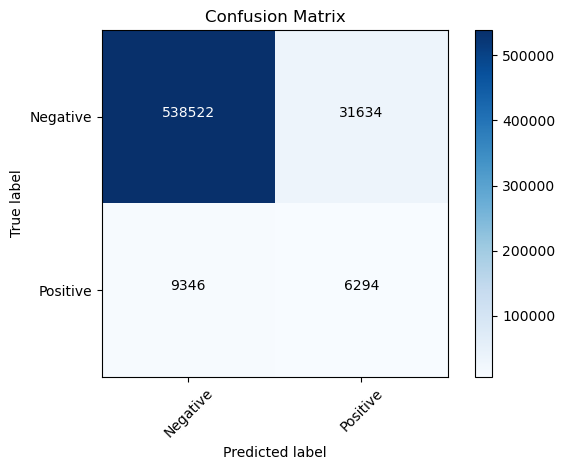

In [33]:
# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['Negative', 'Positive']  # Assuming class names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

ADASYN is working the best for TP, but worst for FP. I'm going to try to tamp this down by balancing with an undersampling method first.

Next let's try to predict probabilities with ADASYN and see how the thresholding might help us. After we'll try over and under sampling simultaneously.

In [551]:
len(y[y==1])/len(y[y==0])

0.02743108903528157

In [552]:
ada = ADASYN(sampling_strategy=0.1, 
             n_neighbors=13,
             random_state=42)

In [553]:
X_resampled, y_resampled = ada.fit_resample(X, y)

In [284]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, 
                                  min_samples_split=150, random_state=42, 
                                  n_jobs=-1) 
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=150, n_jobs=-1,
                       random_state=42)

In [285]:
y_pred = rf_model.predict(X)

In [304]:
y_pred_prob = rf_model.predict_proba(X)

In [315]:
def thresh(array, threshold):
    mod_array = np.copy(array[:,1])
    mod_array[mod_array >= threshold] = 1
    mod_array[mod_array < threshold] = 0
    
    return mod_array

In [306]:
y_pred = thresh(y_pred_prob, 0.9)

In [307]:
# Calculate precision
accuracy = accuracy_score(y, y_pred)

# Calculate precision
precision = precision_score(y, y_pred)

# Calculate recall
recall = recall_score(y, y_pred)

# Calculate F1 score
f1 = f1_score(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9753344167594179
Precision: 0.6654626285079188
Recall: 0.15313299232736574
F1 Score: 0.24897343936795052


In [308]:
conf_matrix = confusion_matrix(y, y_pred)

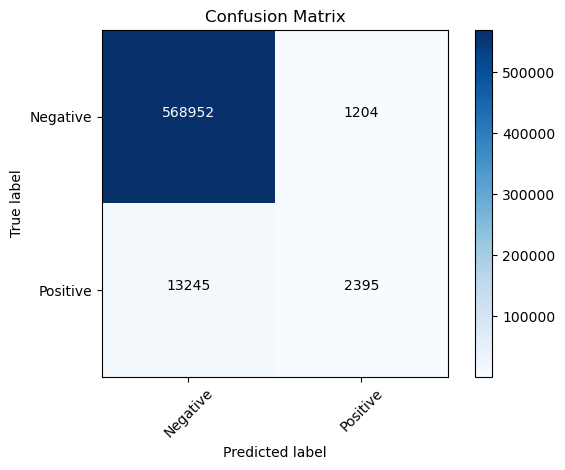

In [309]:
# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['Negative', 'Positive']  # Assuming class names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [154]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.5 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [155]:
from xgboost import XGBClassifier

In [239]:
xgb_classifier = XGBClassifier(random_state=42)

In [240]:
xgb_classifier.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [241]:
y_pred = xgb_classifier.predict(X)

In [242]:
y_pred_prob = xgb_classifier.predict_proba(X)

In [243]:
def thresh(array, threshold):
    mod_array = array[:,1]
    mod_array[mod_array >= threshold] = 1
    mod_array[mod_array < threshold] = 0
    
    return mod_array

In [244]:
y_pred = thresh(y_pred_prob, 0.9)

In [245]:
# Calculate precision
accuracy = accuracy_score(y, y_pred)

# Calculate precision
precision = precision_score(y, y_pred)

# Calculate recall
recall = recall_score(y, y_pred)

# Calculate F1 score
f1 = f1_score(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9748598488210913
Precision: 0.6124661246612466
Recall: 0.15895140664961638
F1 Score: 0.25239859891365046


In [246]:
conf_matrix = confusion_matrix(y, y_pred)

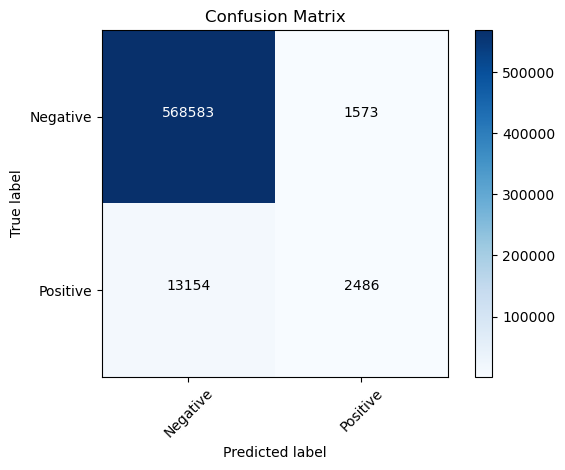

In [247]:
# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['Negative', 'Positive']  # Assuming class names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Under Sampling with more complex methods
We'll try combined over and undersampling now. We'll take our resampled data, and resample again first using TOMEK links.

In [624]:
len(y[y==1])/len(y[y==0])

0.02743108903528157

In [474]:
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours, InstanceHardnessThreshold

In [635]:
tl = InstanceHardnessThreshold(sampling_strategy=0.028)

In [636]:
X_undersampled, y_undersampled = tl.fit_resample(X, y)

In [637]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, 
                                  min_samples_split=150, random_state=42, 
                                  n_jobs=-1) 
rf_model.fit(X_undersampled, y_undersampled)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=150, n_jobs=-1,
                       random_state=42)

In [638]:
y_pred = rf_model.predict(X)

In [651]:
y_pred_prob = rf_model.predict_proba(X)

In [652]:
def thresh(array, threshold):
    mod_array = np.copy(array[:,1])
    mod_array[mod_array >= threshold] = 1
    mod_array[mod_array < threshold] = 0
    
    return mod_array

In [653]:
y_pred = thresh(y_pred_prob, 0.4)

In [654]:
# Calculate precision
accuracy = accuracy_score(y, y_pred)

# Calculate precision
precision = precision_score(y, y_pred)

# Calculate recall
recall = recall_score(y, y_pred)

# Calculate F1 score
f1 = f1_score(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9706177577177038
Precision: 0.41911916032105373
Recall: 0.26042199488491047
F1 Score: 0.3212398454136762


In [655]:
conf_matrix = confusion_matrix(y, y_pred)

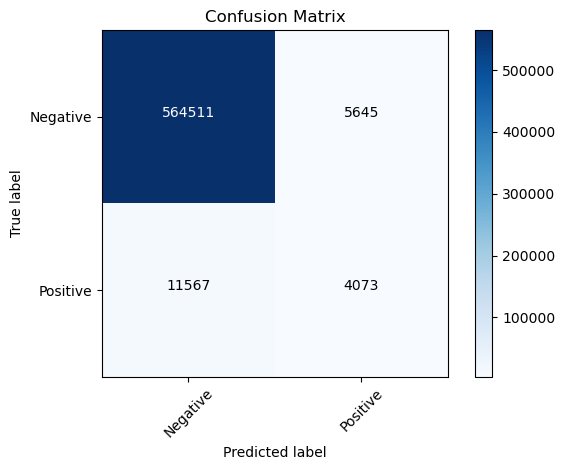

In [656]:
# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['Negative', 'Positive']  # Assuming class names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [ ]:
111919 and 8515

What happens with standard RF and just decreasing probability?

In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

In [11]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, 
                                  min_samples_split=150, random_state=42, 
                                  n_jobs=-1) #using all 4 cpus
rf_model.fit(X, y)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=150, n_jobs=-1,
                       random_state=42)

In [21]:
y_pred_prob = rf_model.predict_proba(X)

In [22]:
def thresh(array, threshold):
    mod_array = np.copy(array[:,1])
    mod_array[mod_array >= threshold] = 1
    mod_array[mod_array < threshold] = 0
    
    return mod_array

In [23]:
y_pred = thresh(y_pred_prob, 0.05)

In [24]:
conf_matrix = confusion_matrix(y, y_pred)

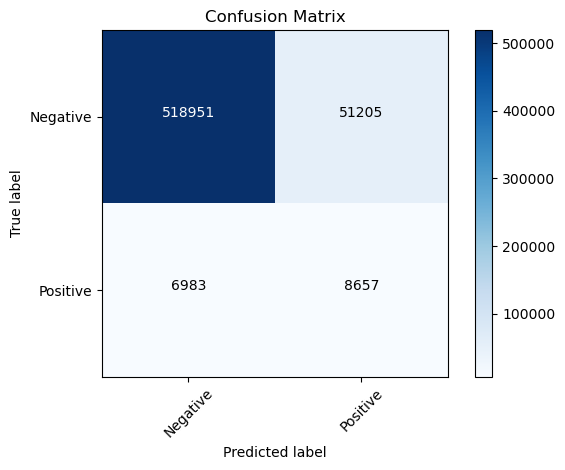

In [25]:
# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['Negative', 'Positive']  # Assuming class names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [657]:
xgb_classifier = XGBClassifier(random_state=42)

In [658]:
xgb_classifier.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [679]:
y_pred_prob = xgb_classifier.predict_proba(X)

In [680]:
def thresh(array, threshold):
    mod_array = np.copy(array[:,1])
    mod_array[mod_array >= threshold] = 1
    mod_array[mod_array < threshold] = 0
    
    return mod_array

In [681]:
y_pred = thresh(y_pred_prob, 0.5)

In [682]:
conf_matrix = confusion_matrix(y, y_pred)

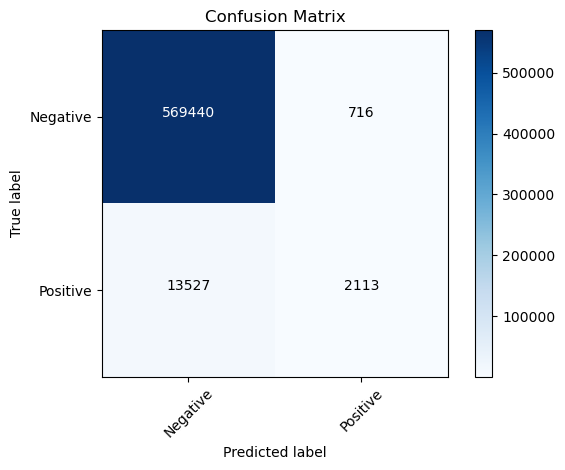

In [683]:
# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['Negative', 'Positive']  # Assuming class names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

XGBoost is a little bit better than Random Forest. We'll also try SVM.

In [9]:
from sklearn.svm import SVC

In [11]:
svm_classifier = SVC(kernel='rbf', C=1.0, 
                     gamma='scale', probability=True,
                     random_state=42)

In [ ]:
svm_classifier.fit(X, y)

In [ ]:
y_pred_prob = svm_classifier.predict_proba(X)

In [ ]:
def thresh(array, threshold):
    mod_array = np.copy(array[:,1])
    mod_array[mod_array >= threshold] = 1
    mod_array[mod_array < threshold] = 0
    
    return mod_array

In [ ]:
y_pred = thresh(y_pred_prob, 0.1)

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)

In [ ]:
# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['Negative', 'Positive']  # Assuming class names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()